In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from darts import TimeSeries

from darts.metrics import mape, mse, rmse, mae
from darts.models.filtering.moving_average_filter import MovingAverageFilter

from utils import print_metrics, plot_forecast, backtest, Dataset, TimeseriesExperiment

import pickle

import os

In [15]:
weather_station_location = pd.read_csv("data/ww2_weather/Weather Station Locations.csv")
weather = pd.read_csv("data/ww2_weather/Summary of Weather.csv")

most_common_station = weather['STA'].value_counts().idxmax()
weather = weather[weather['STA'] == most_common_station]


Ww2_weather_dataset = Dataset(
    TimeSeries.from_dataframe(
        weather,
        time_col="Date",
        value_cols="MeanTemp",
        freq=None,
        fill_missing_dates=True,
    ),
    "weather",
)

/var/folders/sb/lscvlfl93vn61r3jxcm6s4400000gn/T/ipykernel_59133/728423524.py:2: DtypeWarning: Columns (7,8,18,25) have mixed types. Specify dtype option on import or set low_memory=False.
  weather = pd.read_csv("data/ww2_weather/Summary of Weather.csv")


In [16]:
HORIZONS = [1, 2, 3, 5, 7, 9, 10]

def run_experiment(model, params = {}, n_last_series_from_train_in_test = 0):
    for horizon in HORIZONS:
        print("HORIZON: ", horizon)
        experiment = TimeseriesExperiment(
            model,
            Ww2_weather_dataset,
            params,
            use_pretrained_model=True,
            forecast_horizon=horizon,
            retrain=True,
            n_last_series_from_train_in_test=n_last_series_from_train_in_test
        )
        experiment.run()

HORIZON:  1


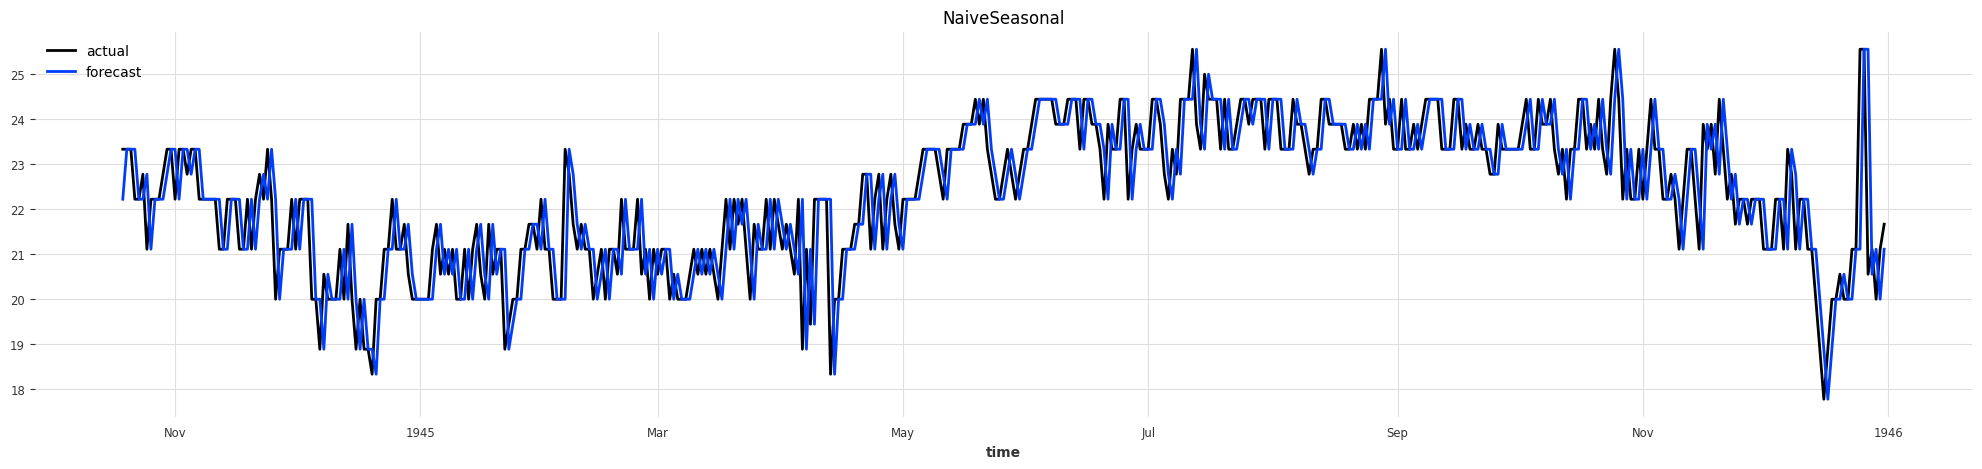

HORIZON:  2


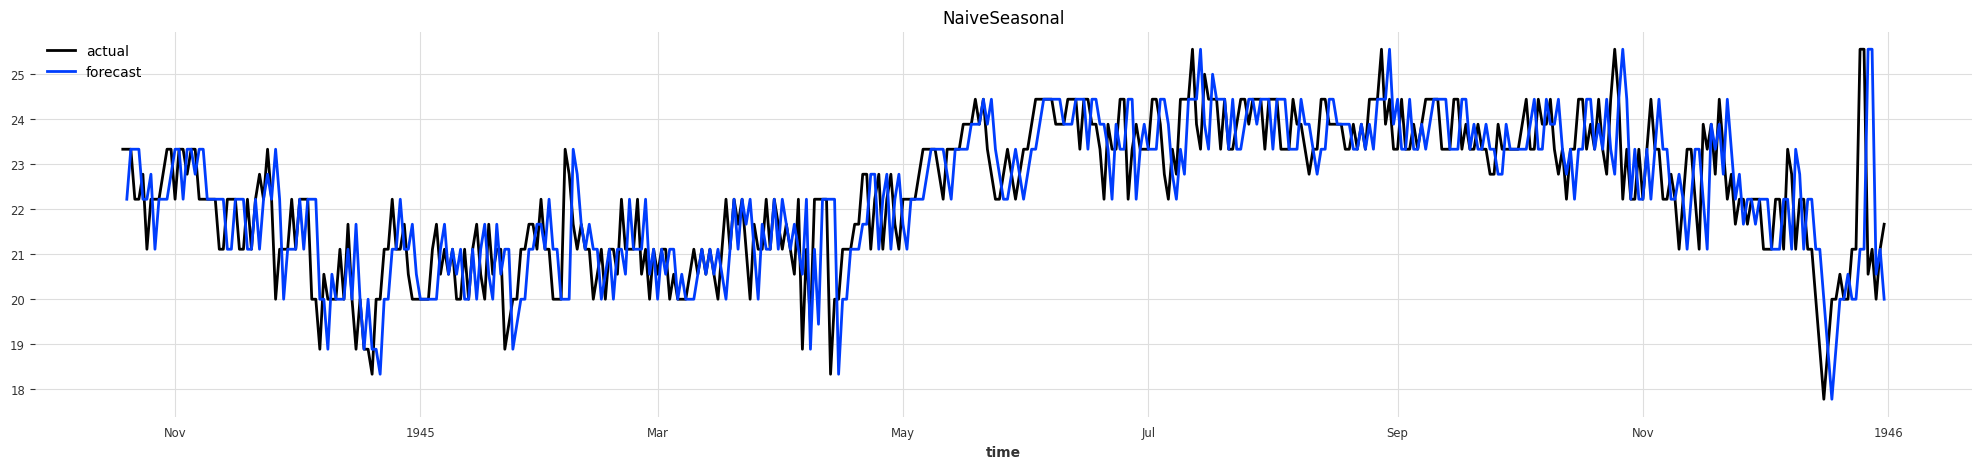

HORIZON:  3


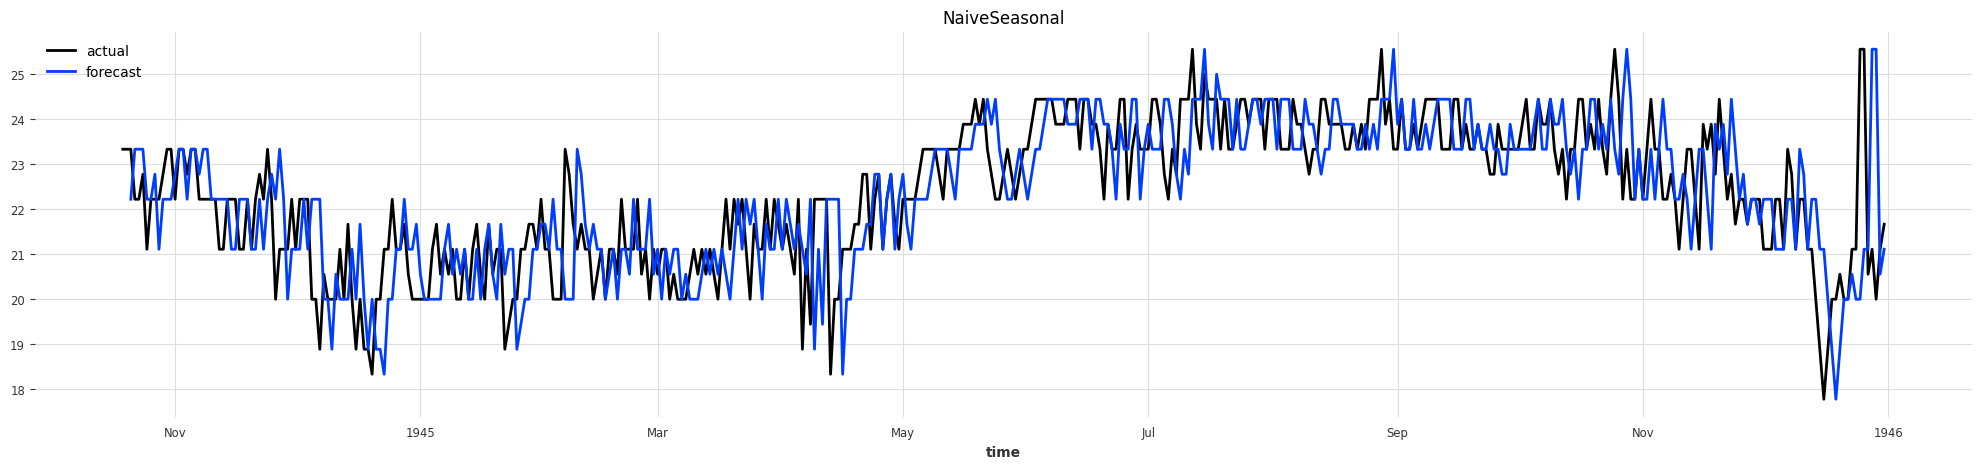

HORIZON:  5


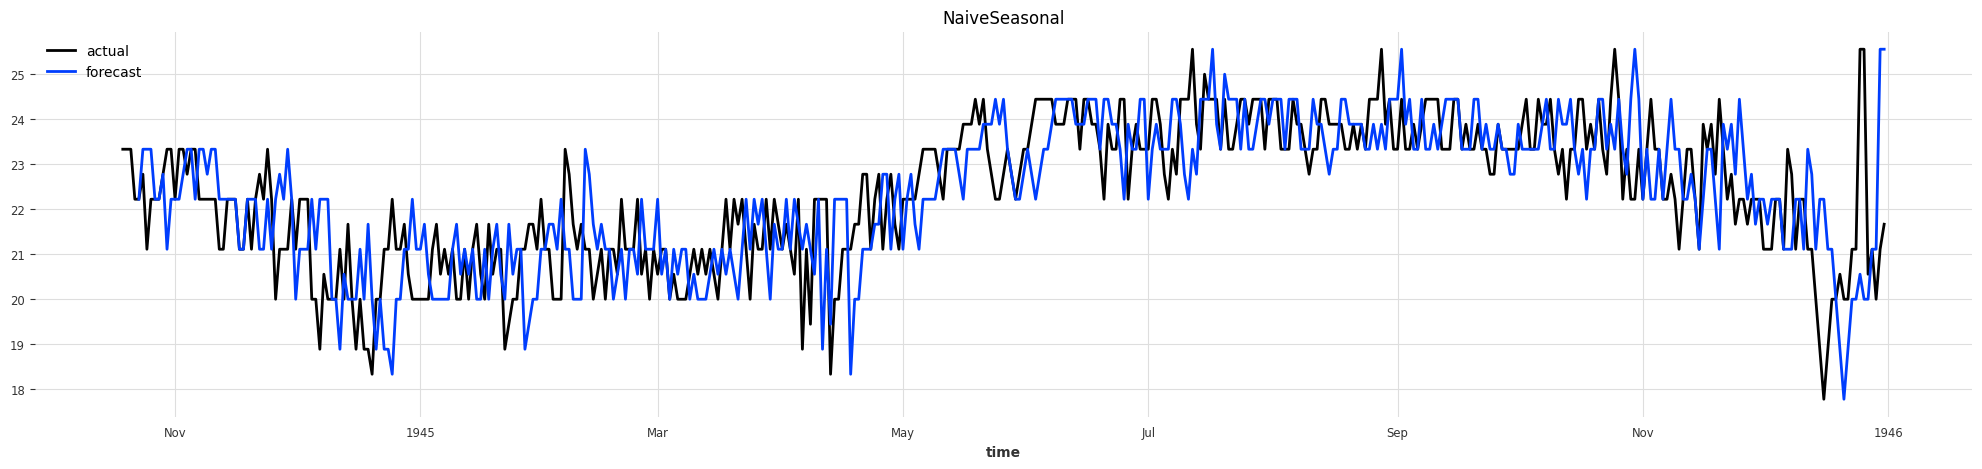

HORIZON:  7


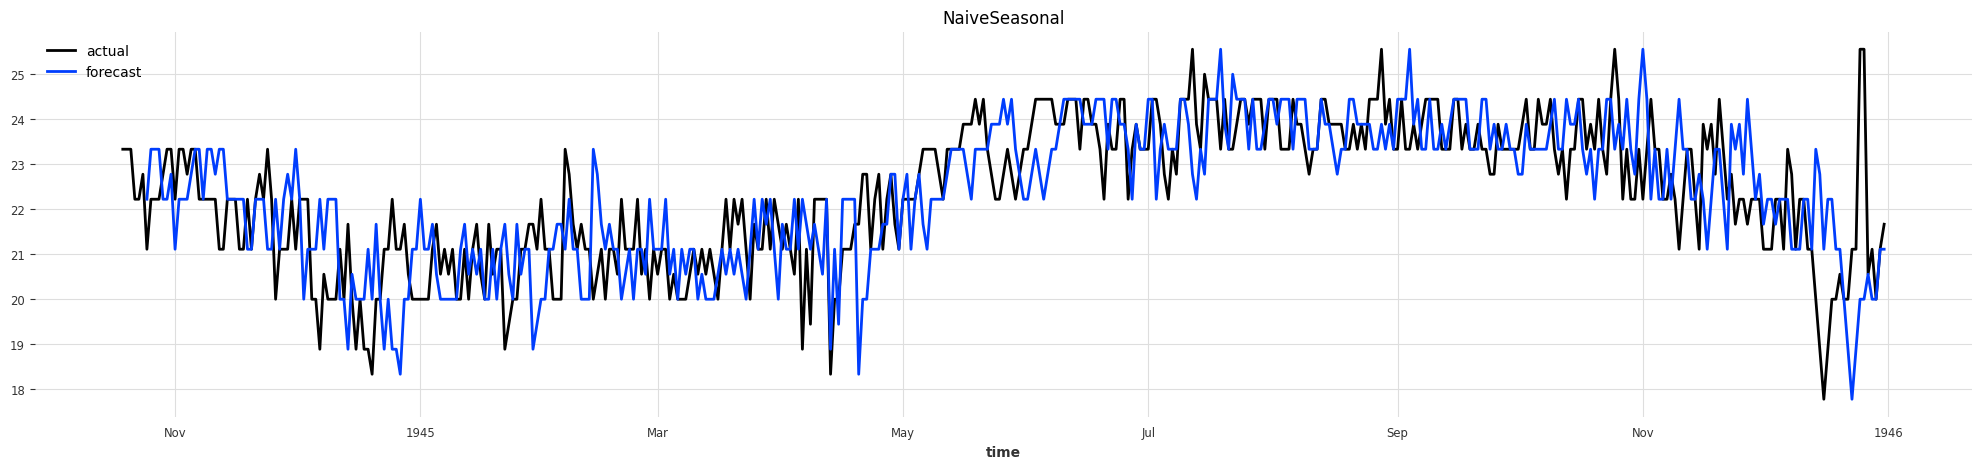

HORIZON:  9


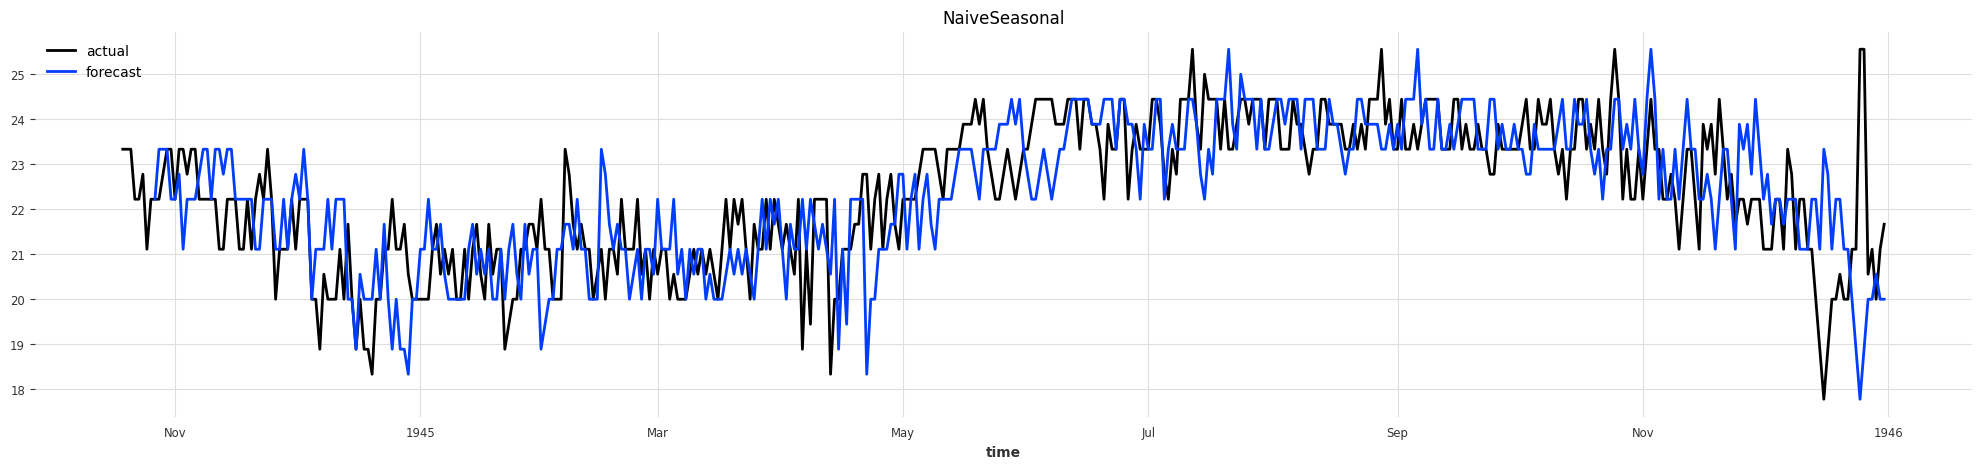

HORIZON:  10


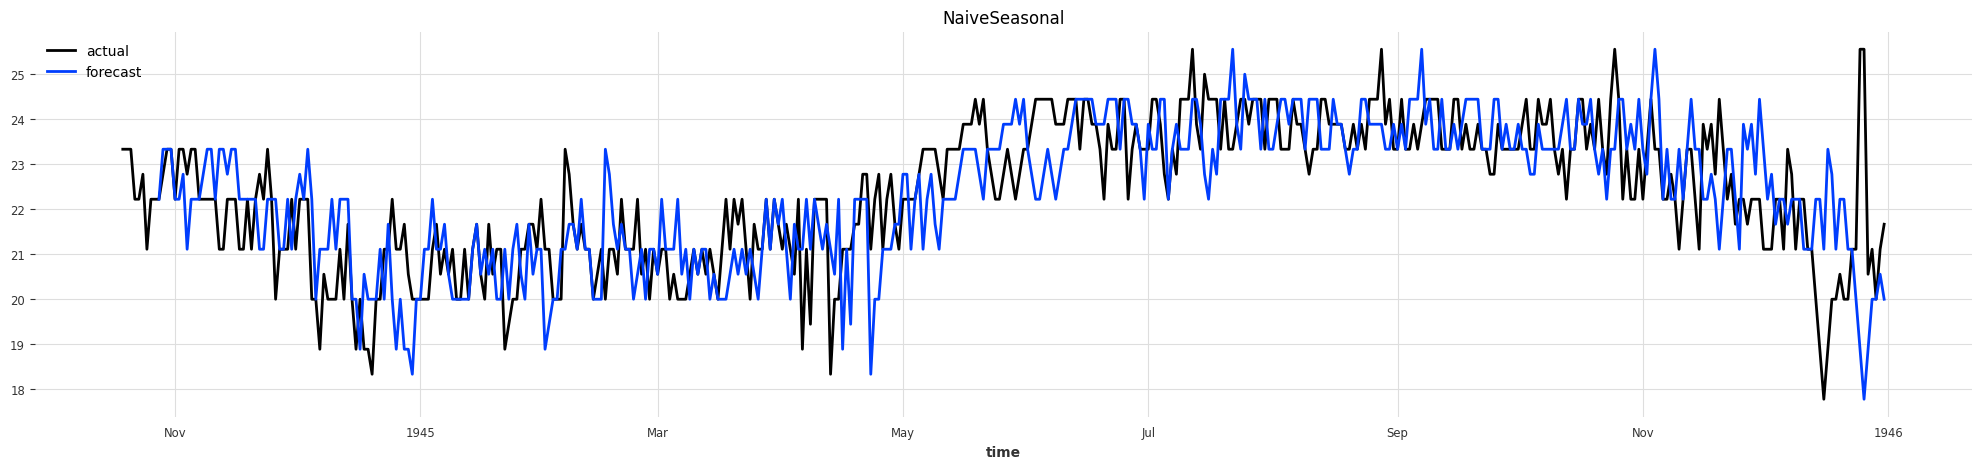

In [17]:
from darts.models import NaiveSeasonal
HORIZONS = [1, 2, 3, 5, 7, 9, 10]

naive_model = NaiveSeasonal(K=1)
run_experiment(naive_model)


In [18]:
from darts.models.forecasting.xgboost import XGBModel

xgb_model = XGBModel(lags=24 * 7) # todo, verify lags

`enable_optimization=True` is ignored because `retrain` is not `False` or `0`.To hide this warning, set `show_warnings=False` or `enable_optimization=False`.


No parameters to search


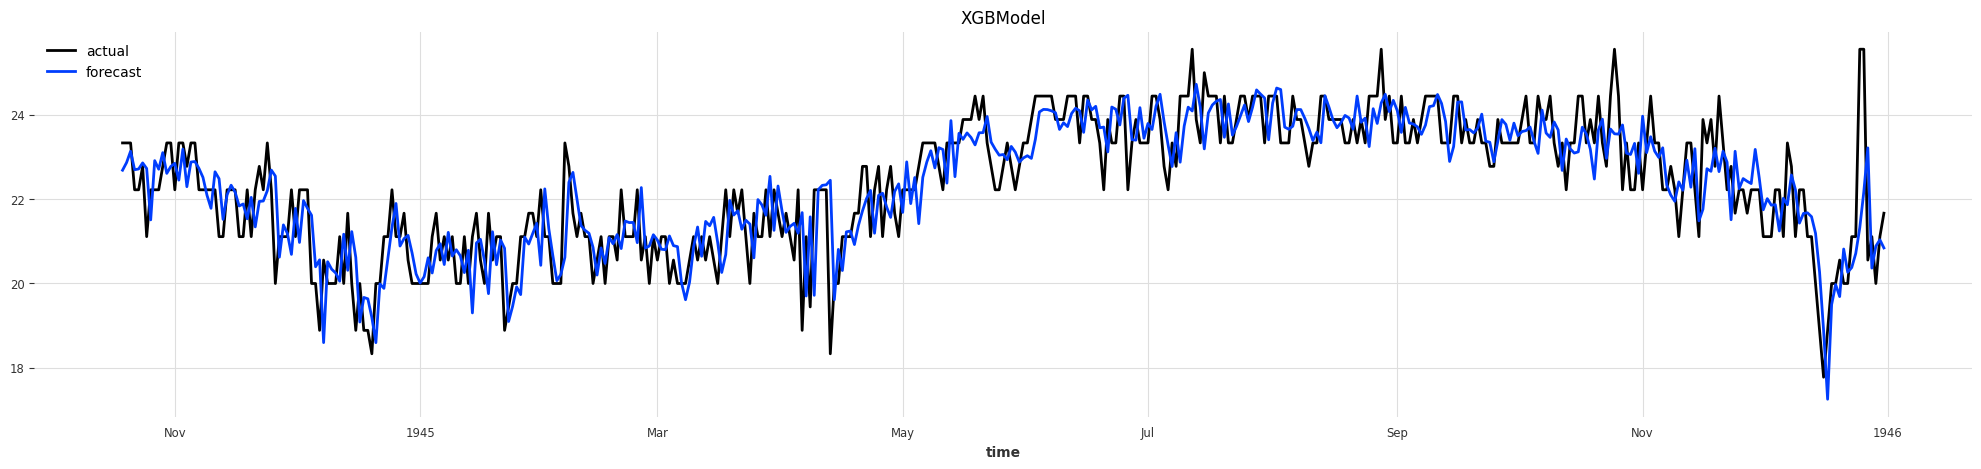

`enable_optimization=True` is ignored because `retrain` is not `False` or `0`.To hide this warning, set `show_warnings=False` or `enable_optimization=False`.


HORIZON:  1


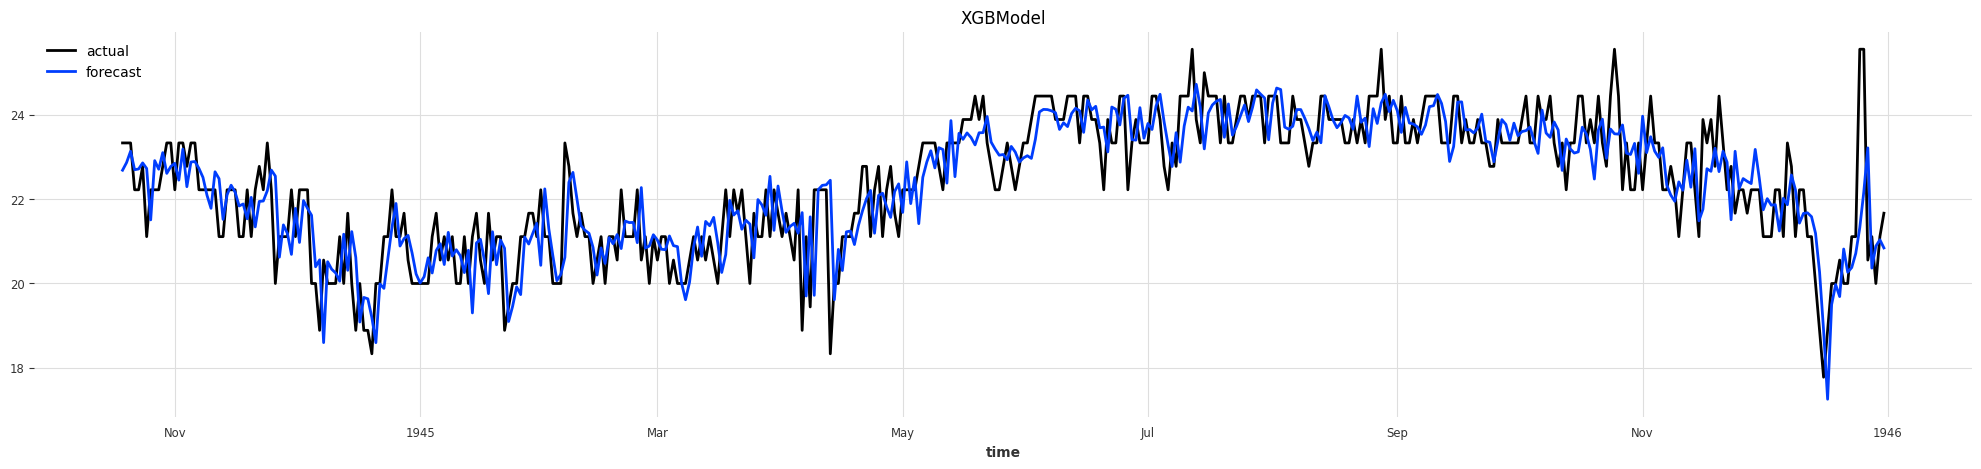

`enable_optimization=True` is ignored because `retrain` is not `False` or `0`.To hide this warning, set `show_warnings=False` or `enable_optimization=False`.
`enable_optimization=True` is ignored because `forecast_horizon > model.output_chunk_length`.To hide this warning, set `show_warnings=False` or `enable_optimization=False`.


HORIZON:  2


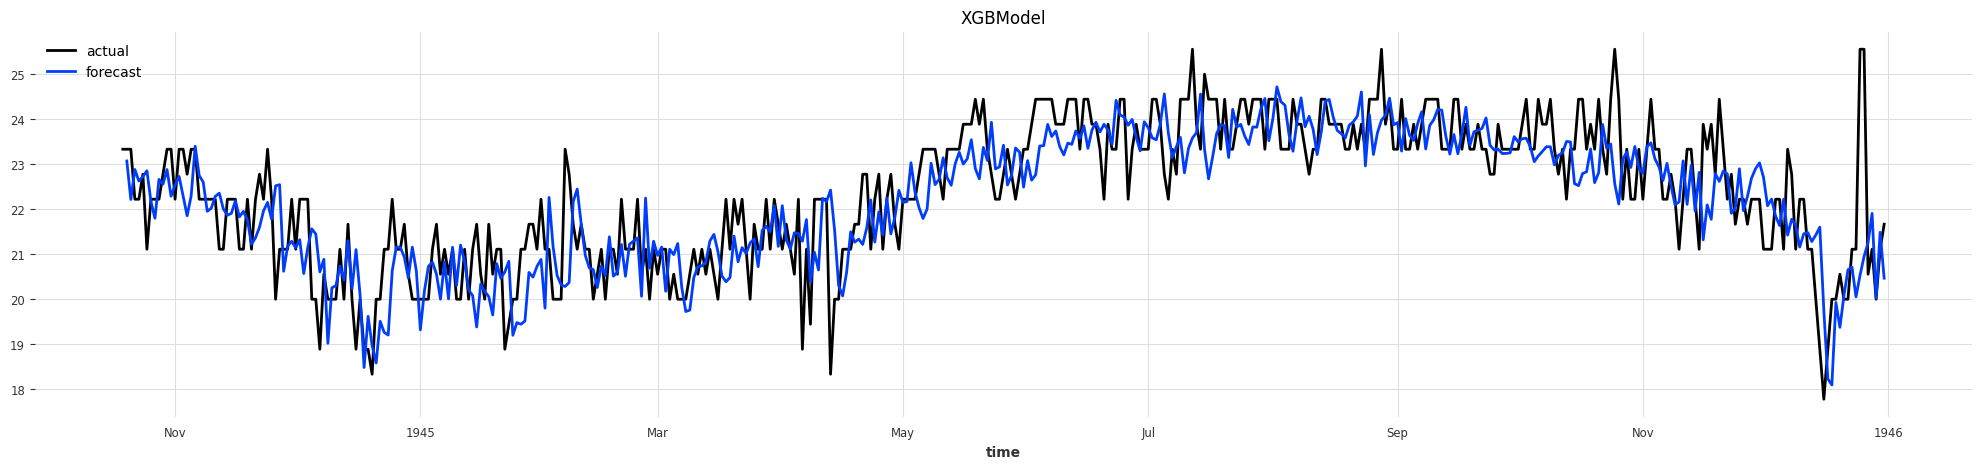

`enable_optimization=True` is ignored because `retrain` is not `False` or `0`.To hide this warning, set `show_warnings=False` or `enable_optimization=False`.
`enable_optimization=True` is ignored because `forecast_horizon > model.output_chunk_length`.To hide this warning, set `show_warnings=False` or `enable_optimization=False`.


HORIZON:  3


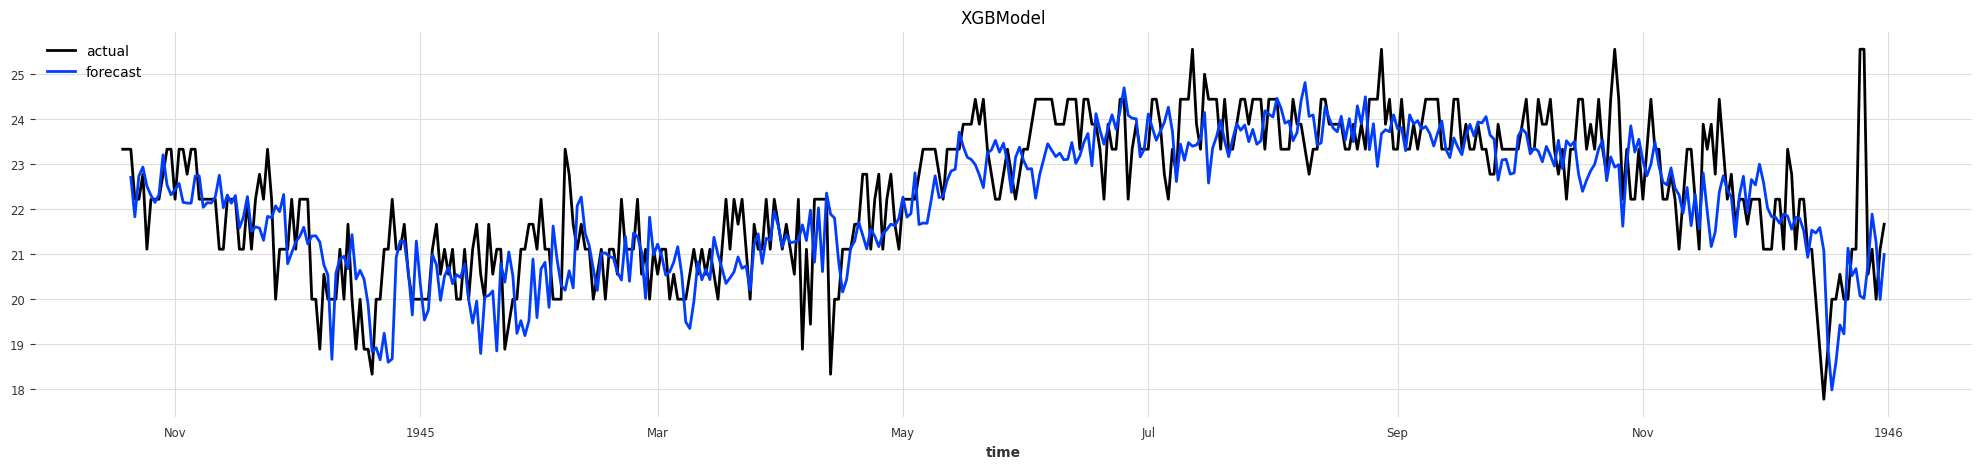

`enable_optimization=True` is ignored because `retrain` is not `False` or `0`.To hide this warning, set `show_warnings=False` or `enable_optimization=False`.
`enable_optimization=True` is ignored because `forecast_horizon > model.output_chunk_length`.To hide this warning, set `show_warnings=False` or `enable_optimization=False`.


HORIZON:  5


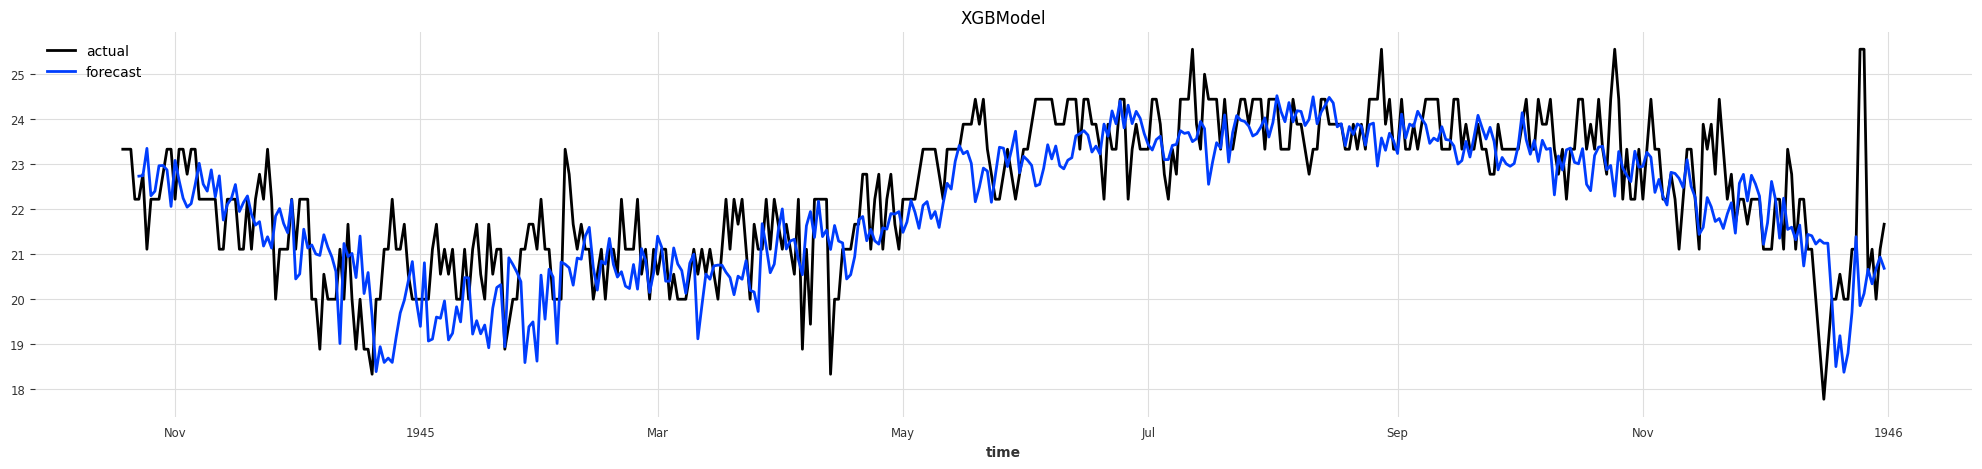

`enable_optimization=True` is ignored because `retrain` is not `False` or `0`.To hide this warning, set `show_warnings=False` or `enable_optimization=False`.
`enable_optimization=True` is ignored because `forecast_horizon > model.output_chunk_length`.To hide this warning, set `show_warnings=False` or `enable_optimization=False`.


HORIZON:  7


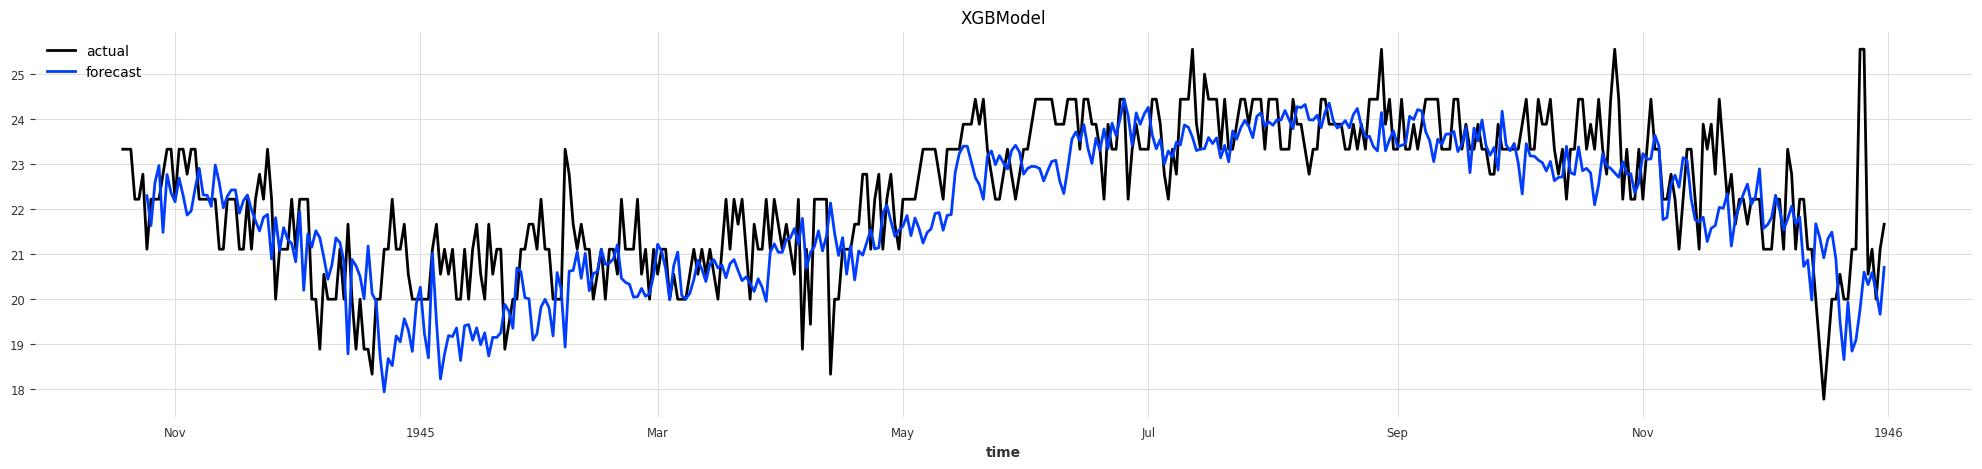

`enable_optimization=True` is ignored because `retrain` is not `False` or `0`.To hide this warning, set `show_warnings=False` or `enable_optimization=False`.
`enable_optimization=True` is ignored because `forecast_horizon > model.output_chunk_length`.To hide this warning, set `show_warnings=False` or `enable_optimization=False`.


HORIZON:  9


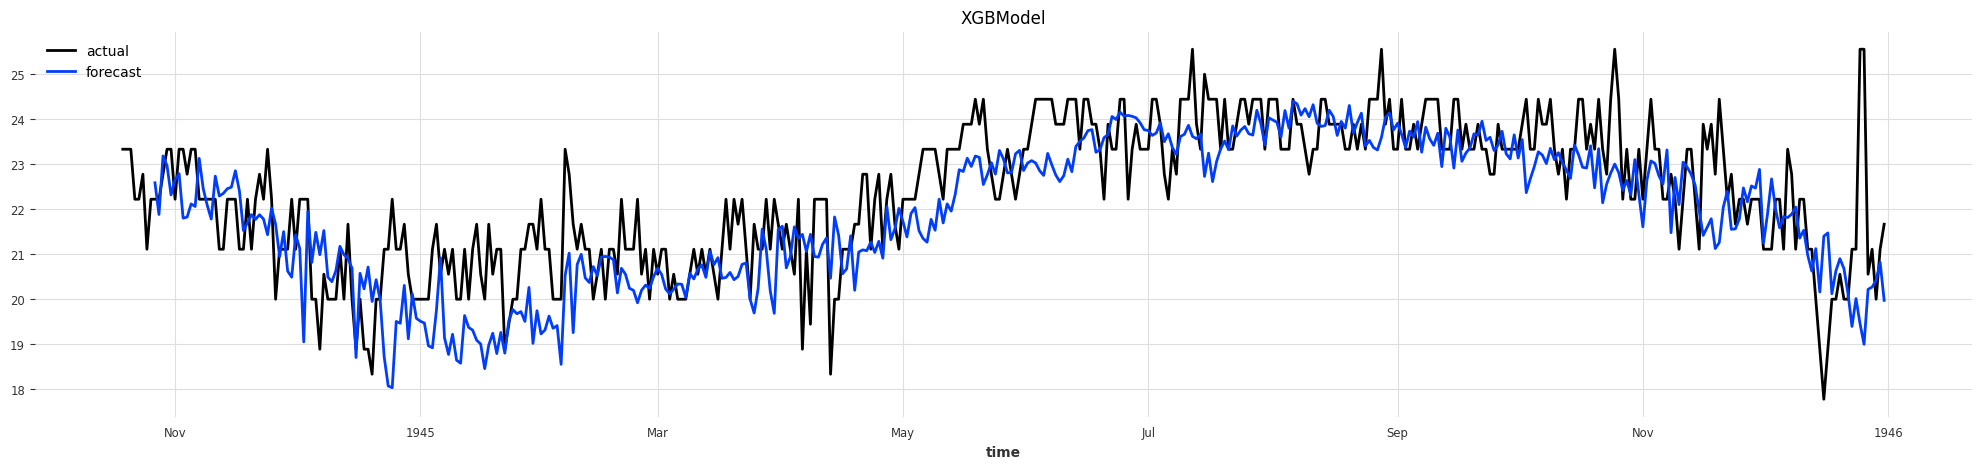

`enable_optimization=True` is ignored because `retrain` is not `False` or `0`.To hide this warning, set `show_warnings=False` or `enable_optimization=False`.
`enable_optimization=True` is ignored because `forecast_horizon > model.output_chunk_length`.To hide this warning, set `show_warnings=False` or `enable_optimization=False`.


HORIZON:  10


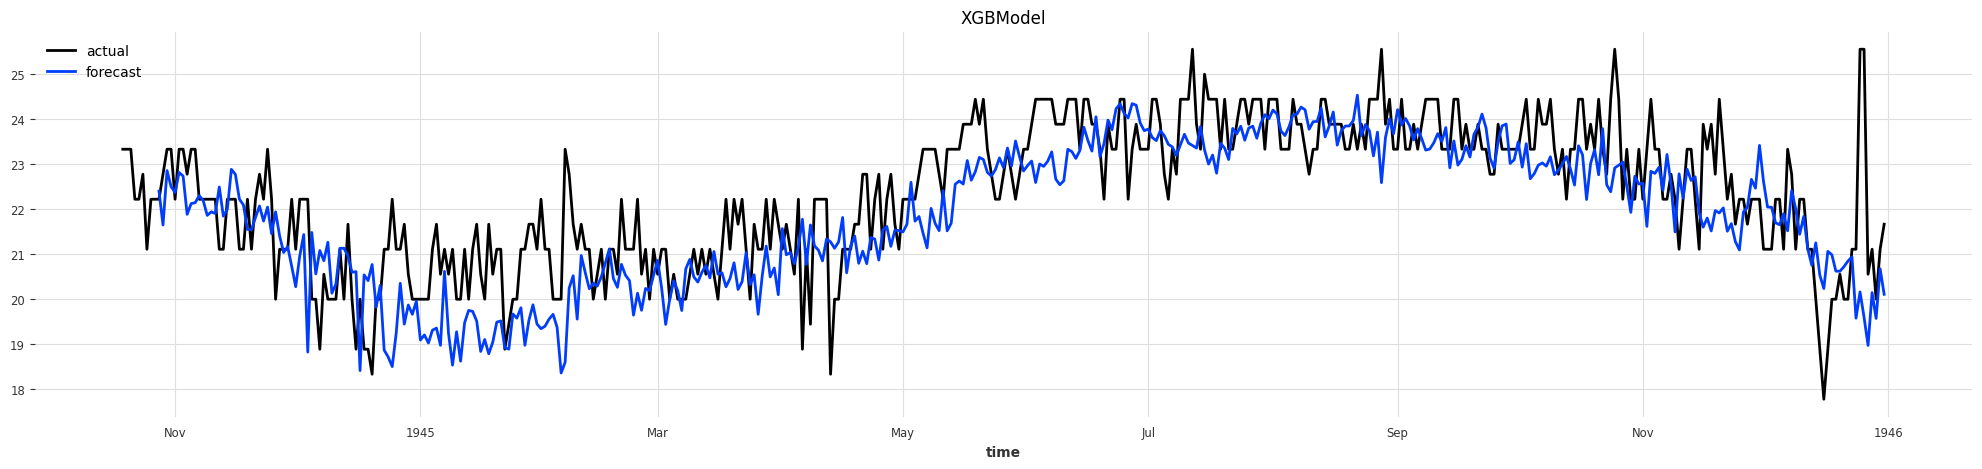

In [20]:
run_experiment(xgb_model, {}, 24 * 7)

In [ ]:
from darts.models import ARIMA
arima = ARIMA()
run_experiment(arima, {"p": [1, 3, 5], "d": [1], "q": [0]}, 1)